In [23]:
#1 Data Manipulation

#Import pandas
#Read the provided CSV file ‘data.csv’.
import pandas as pd
df = pd.read_csv("data.csv")

#C
#Show the basic statistical description about the data.
#df.head()
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [26]:
#D

#Check if NULL values are there in the dataset
df.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,5


In [3]:
#D (i)

#Fill the NULL values with Mean
df = df.fillna(df.mean())
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [4]:
#D

#verifying if there are any NULL values
df.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,0


In [5]:
#E

#Aggregation functions on 3 columns
result = df[['Duration','Pulse','Calories']].agg(['min', 'max','count','mean'])
print("Min, Max, Count and Mean values ")
result


Min, Max, Count and Mean values 


,Duration,Pulse,Calories
min,15.000000,80.000000,50.300000
max,300.000000,159.000000,1860.400000
count,169.000000,169.000000,169.000000
mean,63.846154,107.461538,375.790244


In [6]:
#F

#Filtering with Calories between 500 and 1000
filter1 = df[(df.Calories >= 500) & (df.Calories <= 1000)]
filter1

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [7]:
#G

#Filtering the dataset with calories greater than 500 and pulse less than 100
filter2 = df[(df.Calories > 500) & (df.Pulse < 100)]
filter2

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [8]:
#H

#Showing all columns except Maxpulse in a new dataframe
df_modified = df.loc[:, df.columns!='Maxpulse']
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [9]:
#I

#Deleting Maxpulse from main dataframe
del df["Maxpulse"]
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [10]:
#Existing datatypes of columns in dataframe
df.dtypes

,0
Duration,int64
Pulse,int64
Calories,float64


In [11]:
#J

#Replacing the calories datatype
df.Calories = df.Calories.astype(int)
df.dtypes


,0
Duration,int64
Pulse,int64
Calories,int64


Axes(0.125,0.11;0.775x0.77)


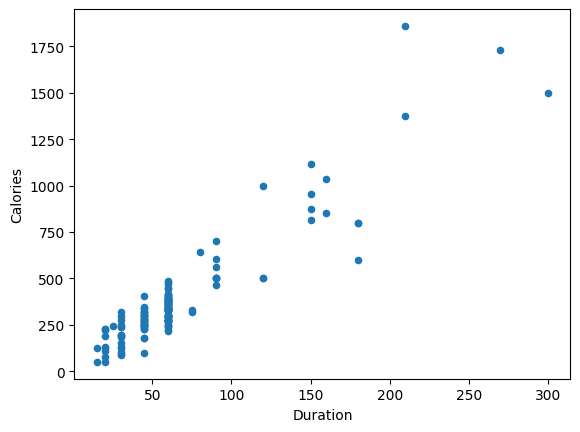

In [27]:
#K

#Visualizing using scatter plot for the two columns (Duration and Calories).
import matplotlib.pyplot as plt
print(df.plot.scatter(x ='Duration', y= 'Calories'))
plt.show()

In [17]:
#2. Linear Regression

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# a) Importing the datasets

salaryData = pd.read_csv('Salary_Data(2)(1)(1).csv')

#excluding last column
X = salaryData.iloc[:, :-1].values
#salary
Y = salaryData.iloc[:, 1].values

salaryData.info()
salaryData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
#b) Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

print("Below is the Split Data:")
print("Train features:")
print(pd.DataFrame(X_train).head())

print("Train targets:")
print(pd.DataFrame(Y_train).head())

print("Test features:")
print(pd.DataFrame(X_test).head())

print("Test targets:")
print(pd.DataFrame(Y_test).head())

Below is the Split Data:
Train features:
     0
0  2.9
1  5.1
2  3.2
3  4.5
4  8.2
Train targets:
          0
0   56642.0
1   66029.0
2   64445.0
3   61111.0
4  113812.0
Test features:
      0
0   1.5
1  10.3
2   4.1
3   3.9
4   9.5
Test targets:
          0
0   37731.0
1  122391.0
2   57081.0
3   63218.0
4  116969.0


In [20]:
# c) Train and predict the model

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Predicted values:", Y_pred)

Predicted values: [ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [21]:

#d) Calculate the mean_squared error

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 21026037.329511296


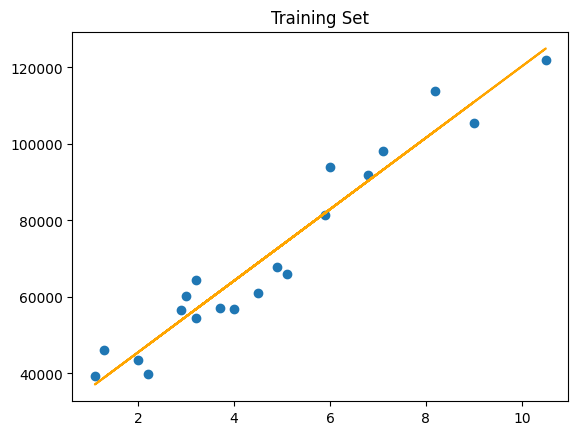

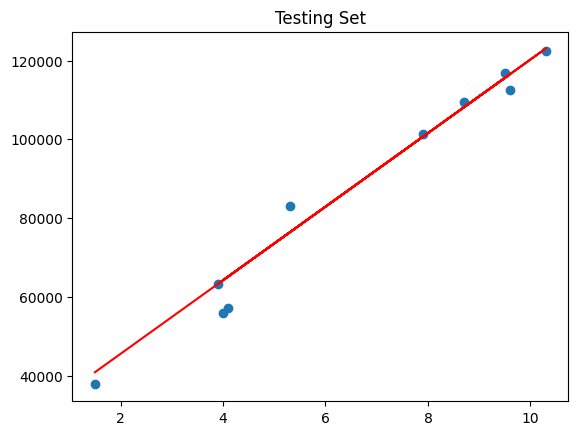

In [25]:
#e) Visualize both train and test data using scatter plot.

# Training Data
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color='Orange')
plt.title('Training Set')
plt.show()

# Testing Data
plt.scatter(X_test, Y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title('Testing Set')
plt.show()
